In [ ]:
!pip install nltk
!pip install keras

!pip install HAZM
!pip install stopwords_guilannlp

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from hazm import *
from stopwords_guilannlp import *
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
import hazm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline



In [ ]:
df = pd.read_excel('/content/dk recooord_2000.xlsx')
# Keeping only the neccessary columns
df = df[['comment','Label']]


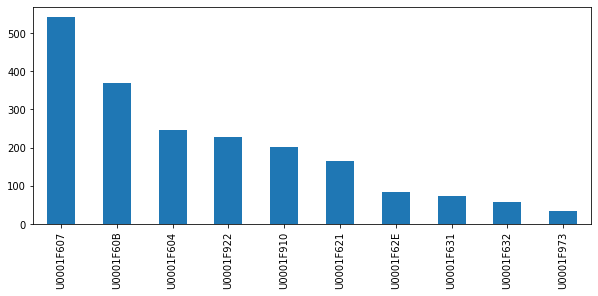

In [ ]:
plt.figure(figsize=(10,4))
df.Label.value_counts().plot(kind='bar');

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
STOP=stopwords_output("Persian", "nar")
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOP) # delete stopwors from text

    return text
    
df['comment'] = df['comment'].apply(clean_text)

In [ ]:
df['comment'].apply(lambda x: len(x.split(' '))).sum()

3074

In [ ]:
X=df.comment
y=df.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

In [ ]:
names=pd.read_csv('/content/Emojiiiiii.csv')
my_tags =names.Code
my_tags

0    U0001F604
1    U0001F607
2    U0001F60B
3    U0001F910
4    U0001F62E
5    U0001F922
6    U0001F973
7    U0001F632
8    U0001F631
9    U0001F621
Name: Code, dtype: object

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.26
              precision    recall  f1-score   support

   U0001F604       0.00      0.00      0.00        50
   U0001F607       0.26      0.97      0.41       103
   U0001F60B       0.21      0.06      0.09        70
   U0001F621       0.00      0.00      0.00        34
   U0001F62E       0.00      0.00      0.00        17
   U0001F631       0.00      0.00      0.00        16
   U0001F632       0.00      0.00      0.00        16
   U0001F910       0.00      0.00      0.00        34
   U0001F922       0.00      0.00      0.00        53
   U0001F973       0.00      0.00      0.00         7

    accuracy                           0.26       400
   macro avg       0.05      0.10      0.05       400
weighted avg       0.10      0.26      0.12       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=12, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.2525
              precision    recall  f1-score   support

   U0001F604       0.50      0.04      0.07        50
   U0001F607       0.27      0.90      0.41       103
   U0001F60B       0.17      0.04      0.07        70
   U0001F621       0.00      0.00      0.00        34
   U0001F62E       0.50      0.06      0.11        17
   U0001F631       0.00      0.00      0.00        16
   U0001F632       0.00      0.00      0.00        16
   U0001F910       0.17      0.03      0.05        34
   U0001F922       0.11      0.02      0.03        53
   U0001F973       0.00      0.00      0.00         7

    accuracy                           0.25       400
   macro avg       0.17      0.11      0.07       400
weighted avg       0.21      0.25      0.14       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
